In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob as g
from sunpy.net import Fido, attrs as a
import astropy.units as u

In [2]:
file = np.sort(g.glob("C:\\Users\\ybaru\\OneDrive\\Desktop\\Space_Astro_class\\Test datasets\\CT_dataset1\\*.fits"))
img = fits.open(file[5])  

data = img[1].data
header = img[1].header  

### Data cleaning 
##### (Removing negative values from SDO AIA data)

In [3]:
data
data_corrected = data.copy()

data_corrected[data_corrected < 0] = 0

## Visualisation

### Depicting data as an image

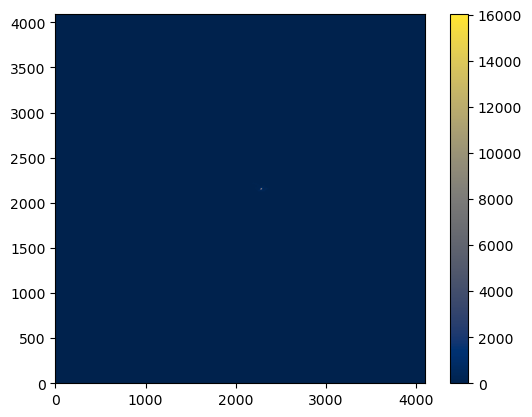

In [4]:
plt.imshow(data_corrected, cmap='cividis', origin='lower')
plt.colorbar()

In [5]:
x = np.arange(0, data_corrected.shape[0], 1)
y = np.arange(0, data_corrected.shape[1], 1)

[X, Y] = np.meshgrid(x, y)

Text(0.5, 0, 'Intensity')

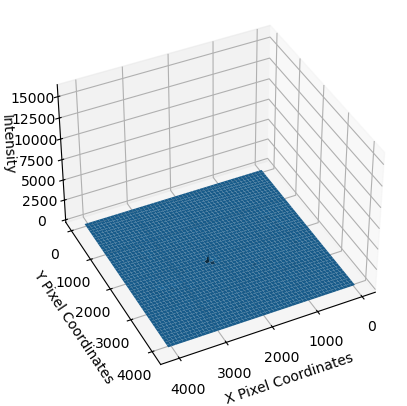

In [6]:
ax = plt.axes(projection ='3d')
ax.plot_surface(X,Y,data_corrected)
ax.view_init(elev=39, azim=64)
ax.set_xlabel('X Pixel Coordinates')
ax.set_ylabel('Y Pixel Coordinates')
ax.set_zlabel('Intensity')

### Intensity thresholding

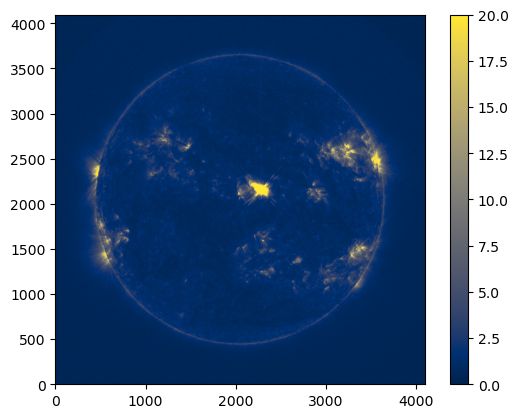

In [7]:
vmin = 0
vmax = 20
modified_data = data_corrected.copy()

modified_data[modified_data < vmin] = vmin
modified_data[modified_data > vmax] = vmax

plt.imshow(modified_data, origin='lower', cmap='cividis')
plt.colorbar()

#plt.savefig("image.png", dpi=600, bbox_inches='tight',pad_inches=0.25)

Text(0.5, 0, 'Intensity')

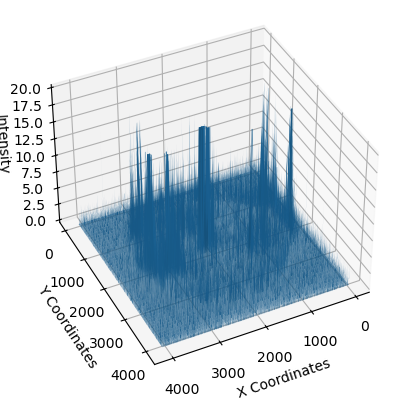

In [8]:
x = np.arange(0, data_corrected.shape[0], 1)
y = np.arange(0, data_corrected.shape[1], 1)

[X, Y] = np.meshgrid(x, y)

ax = plt.axes(projection ='3d')
ax.plot_surface(X,Y,modified_data)
ax.view_init(elev=39, azim=64)
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Intensity')

### Contours

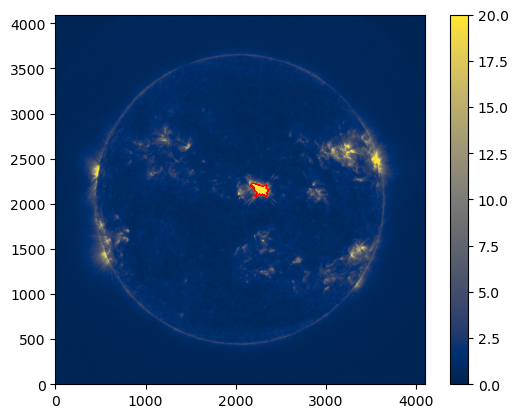

In [9]:
from skimage import measure

contours = measure.find_contours(modified_data, level=19.9)

plt.imshow(modified_data,origin='lower',cmap='cividis')
for contour in contours:
    if len(contour.data) > 1800:
        plt.plot(contour[:,1],contour[:,0],lw=0.8, color='red')
plt.colorbar()
#plt.savefig("contour.png", dpi=600, bbox_inches='tight',pad_inches=0.25)

### Average and total intensity of the image

In [10]:
Average_intensity = np.mean(data_corrected)
print(Average_intensity, 'DN')

1.43113774061203 DN


In [11]:
img[1].header['DATAMEAN']

1.14

In [12]:
Total_intensity = np.sum(data_corrected)
print(Total_intensity, 'DN')

24010507 DN


### Finding pixel with maximum intensity

In [13]:
max_intensity_loc = np.where(data_corrected == data_corrected.max())
x = max_intensity_loc[0][0]
y = max_intensity_loc[1][0]
print('Location of the brightest pixel: ', x, y)
print('Highest intensity: ', data_corrected[x][y], 'DN')

Location of the brightest pixel:  2153 2286
Highest intensity:  16044 DN


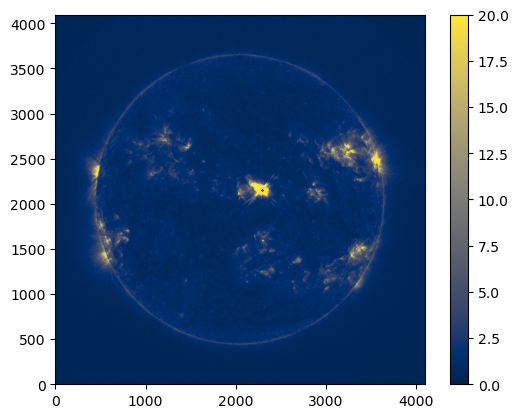

In [14]:
plt.imshow(modified_data, cmap='cividis', origin='lower')
plt.colorbar()
plt.scatter(y, x, c='r', s=1, marker = 'x')

### Lightcurve

In [15]:
total_intensity = []

for i in range(len(file)):
    img = fits.open(file[i])
    data = img[1].data
    data_corrected = data.copy()
    data_corrected[data_corrected < 0] = 0
    header = img[1].header
    total_intensity.append(np.sum(data_corrected))

time = [i for i in range(0, len(total_intensity))]

Text(0, 0.5, 'Pixel Intensity Unit (DN)')

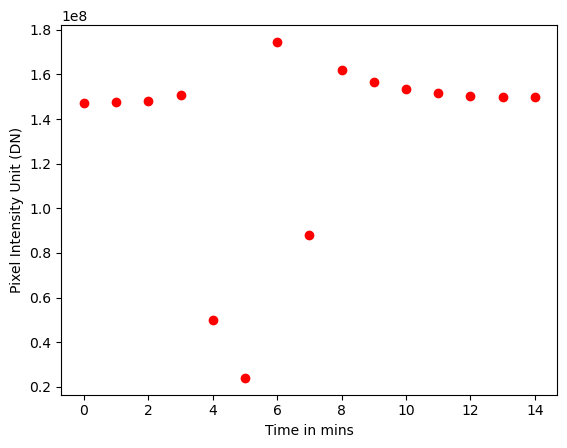

In [16]:
plt.plot(time, total_intensity,'ro')
plt.xlabel('Time in mins')
plt.ylabel('Pixel Intensity Unit (DN)')

In [17]:
for i in range(len(file)):
    img = fits.open(file[i])
    data = img[1].data
    header = img[1].header
    print('exposure time: ', header['EXPTIME'], 's')

exposure time:  2.901334 s
exposure time:  2.901338 s
exposure time:  2.901339 s
exposure time:  2.901335 s
exposure time:  0.718136 s
exposure time:  0.303909 s
exposure time:  2.900803 s
exposure time:  1.491729 s
exposure time:  2.900804 s
exposure time:  2.900802 s
exposure time:  2.900803 s
exposure time:  2.900803 s
exposure time:  2.900807 s
exposure time:  2.900807 s
exposure time:  2.900807 s


#### Lightcurve after correcting for exposure time

Text(0, 0.5, 'Pixel Intensity Unit (DN)')

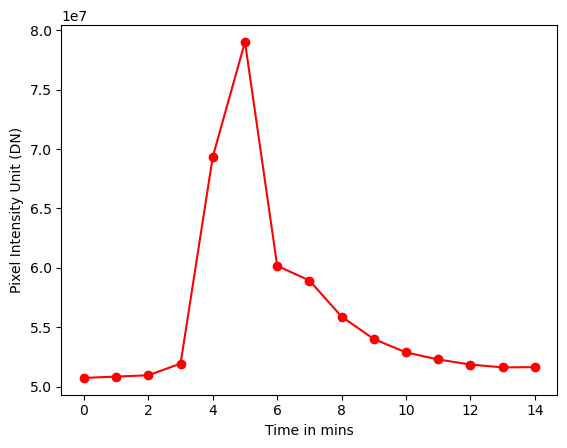

In [18]:
total_intensity = []

for i in range(len(file)):
    img = fits.open(file[i])
    data = img[1].data
    data_corrected = data.copy()
    data_corrected[data_corrected < 0] = 0
    header = img[1].header
    total_intensity.append(np.sum(data_corrected)/header['EXPTIME'])

time = [i for i in range(0, len(total_intensity))]

plt.plot(time, total_intensity, 'ro-')
plt.xlabel('Time in mins')
plt.ylabel('Pixel Intensity Unit (DN)')
#plt.savefig(

### Save data arrays into a text file

In [19]:
np.savetxt('lightcurve.txt', np.transpose([time, total_intensity]))